In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

In [2]:
data = pd.read_csv("C:\\Users\\home\\Downloads\\MLP End term project- Clustering.csv")

In [3]:
df = data.sample(n=5000)

In [4]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
48830,25860855,3/11/2020,M,3.0,1/21/1972,694.0,C,115.5,4,SEDAN,0.561,NaN,0,0.000000,716.53
14585,51930777,10/4/2020,M,3.0,6/5/1970,693.0,C,85.5,3,UTE,1.111,NaN,0,0.000000,716.53
43414,87210963,4/14/2020,F,4.0,7/5/1960,697.0,C,120.0,3,HBACK,0.990,NaN,0,0.000000,716.53
56059,26887735,1/28/2020,F,4.0,8/2/1961,708.0,C,132.0,3,SEDAN,1.419,D,1,161.258755,716.53
47306,60151089,3/20/2020,F,1.0,10/26/1998,491.0,E,58.5,1,STNWG,3.135,B,1,20657.362590,716.53


In [5]:
df.tail()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
15708,22440301,9/27/2020,F,2.0,10/4/1988,317.0,C,145.5,2,SEDAN,2.55200,NaN,0,0.000000,716.53
14294,67423423,10/6/2020,F,4.0,11/1/1966,793.0,C,97.5,1,HBACK,1.85185,NaN,0,0.000000,716.53
9950,58641742,11/1/2020,F,3.0,3/17/1973,679.0,D,128.3,2,STNWG,4.01500,NaN,0,0.000000,716.53
38410,41224979,5/14/2020,F,1.0,8/25/1995,623.0,B,130.1,2,SEDAN,2.47500,NaN,0,0.000000,716.53
57984,39048902,1/16/2020,F,6.0,7/28/1942,423.0,C,109.5,3,SEDAN,3.26700,D,1,3474.502608,716.53


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 48830 to 57984
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      5000 non-null   int64  
 1   pol_eff_dt      5000 non-null   object 
 2   gender          5000 non-null   object 
 3   agecat          4617 non-null   float64
 4   date_of_birth   5000 non-null   object 
 5   credit_score    4753 non-null   float64
 6   area            5000 non-null   object 
 7   traffic_index   4700 non-null   float64
 8   veh_age         5000 non-null   int64  
 9   veh_body        5000 non-null   object 
 10  veh_value       5000 non-null   float64
 11  claim_office    817 non-null    object 
 12  numclaims       5000 non-null   int64  
 13  claimcst0       5000 non-null   float64
 14  annual_premium  5000 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 625.0+ KB


In [7]:
df.describe()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
count,5.000000e+03,4617.000000,4753.000000,4700.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,5.543205e+07,3.479316,663.487061,104.225426,2.704400,1.937424,0.211000,581.297862,7.165300e+02
std,2.599752e+07,1.415000,136.472416,33.230511,1.057187,1.354453,0.548579,3215.839769,7.072029e-11
min,1.005658e+07,1.000000,301.000000,4.500000,1.000000,0.000000,0.000000,0.000000,7.165300e+02
25%,3.292751e+07,2.000000,605.000000,80.900000,2.000000,1.111000,0.000000,0.000000,7.165300e+02
50%,5.559523e+07,3.000000,682.000000,109.300000,3.000000,1.617000,0.000000,0.000000,7.165300e+02
75%,7.821773e+07,5.000000,772.000000,130.700000,4.000000,2.321000,0.000000,0.000000,7.165300e+02
max,9.996162e+07,6.000000,850.000000,206.100000,4.000000,25.949000,5.000000,56261.626170,7.165300e+02


In [8]:
df.shape

(5000, 15)

In [9]:
df.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat             383
date_of_birth        0
credit_score       247
area                 0
traffic_index      300
veh_age              0
veh_body             0
veh_value            0
claim_office      4183
numclaims            0
claimcst0            0
annual_premium       0
dtype: int64

In [10]:
df['agecat'].mean()

3.4793155728828244

In [11]:
df['agecat'] = df['agecat'].fillna(3.47)

In [12]:
df['credit_score'].mean()

663.4870608037029

In [13]:
df['credit_score'] = df['credit_score'].fillna(661.41)

In [14]:
df['traffic_index'].mean()

104.22542553191495

In [15]:
df['traffic_index'] = df['traffic_index'].fillna(103.28)

In [16]:
df.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat               0
date_of_birth        0
credit_score         0
area                 0
traffic_index        0
veh_age              0
veh_body             0
veh_value            0
claim_office      4183
numclaims            0
claimcst0            0
annual_premium       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 48830 to 57984
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      5000 non-null   int64  
 1   pol_eff_dt      5000 non-null   object 
 2   gender          5000 non-null   object 
 3   agecat          5000 non-null   float64
 4   date_of_birth   5000 non-null   object 
 5   credit_score    5000 non-null   float64
 6   area            5000 non-null   object 
 7   traffic_index   5000 non-null   float64
 8   veh_age         5000 non-null   int64  
 9   veh_body        5000 non-null   object 
 10  veh_value       5000 non-null   float64
 11  claim_office    817 non-null    object 
 12  numclaims       5000 non-null   int64  
 13  claimcst0       5000 non-null   float64
 14  annual_premium  5000 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 625.0+ KB


In [18]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
48830,25860855,3/11/2020,M,3.0,1/21/1972,694.0,C,115.5,4,SEDAN,0.561,NaN,0,0.000000,716.53
14585,51930777,10/4/2020,M,3.0,6/5/1970,693.0,C,85.5,3,UTE,1.111,NaN,0,0.000000,716.53
43414,87210963,4/14/2020,F,4.0,7/5/1960,697.0,C,120.0,3,HBACK,0.990,NaN,0,0.000000,716.53
56059,26887735,1/28/2020,F,4.0,8/2/1961,708.0,C,132.0,3,SEDAN,1.419,D,1,161.258755,716.53
47306,60151089,3/20/2020,F,1.0,10/26/1998,491.0,E,58.5,1,STNWG,3.135,B,1,20657.362590,716.53


In [19]:
df = df.replace(['?'],'NaN')

In [20]:
df['claim_office'].value_counts()

B    322
D    250
A    171
C     74
Name: claim_office, dtype: int64

In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
df.shape

(817, 15)

In [23]:
df.isnull().sum()

pol_number        0
pol_eff_dt        0
gender            0
agecat            0
date_of_birth     0
credit_score      0
area              0
traffic_index     0
veh_age           0
veh_body          0
veh_value         0
claim_office      0
numclaims         0
claimcst0         0
annual_premium    0
dtype: int64

In [24]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
56059,26887735,1/28/2020,F,4.0,8/2/1961,708.00,C,132.0,3,SEDAN,1.419,D,1,161.258755,716.53
47306,60151089,3/20/2020,F,1.0,10/26/1998,491.00,E,58.5,1,STNWG,3.135,B,1,20657.362590,716.53
25301,15840343,8/1/2020,M,2.0,6/25/1985,527.00,C,139.5,4,STNWG,1.848,C,3,2032.002994,716.53
30095,94815203,7/2/2020,M,2.0,2/5/1986,661.41,D,88.1,4,HDTOP,1.386,B,1,739.313466,716.53
14020,57195579,10/7/2020,M,1.0,4/23/1995,661.41,A,112.6,4,UTE,1.364,B,4,1761.915983,716.53


In [25]:
df_corr = df.corr()

In [26]:
df_corr

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
pol_number,1.000000,-0.037711,-0.008134,-0.006670,0.085439,-0.055912,-0.028753,-0.079741,NaN
agecat,-0.037711,1.000000,0.139291,0.085714,-0.002022,-0.037850,0.023562,0.021780,NaN
credit_score,-0.008134,0.139291,1.000000,0.005171,0.036013,0.024078,-0.003529,-0.366647,NaN
traffic_index,-0.006670,0.085714,0.005171,1.000000,-0.007337,-0.035391,0.002718,-0.081558,NaN
veh_age,0.085439,-0.002022,0.036013,-0.007337,1.000000,-0.568698,0.038545,-0.344552,NaN
veh_value,-0.055912,-0.037850,0.024078,-0.035391,-0.568698,1.000000,-0.069813,0.260600,NaN
numclaims,-0.028753,0.023562,-0.003529,0.002718,0.038545,-0.069813,1.000000,0.224944,NaN
claimcst0,-0.079741,0.021780,-0.366647,-0.081558,-0.344552,0.260600,0.224944,1.000000,NaN
annual_premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

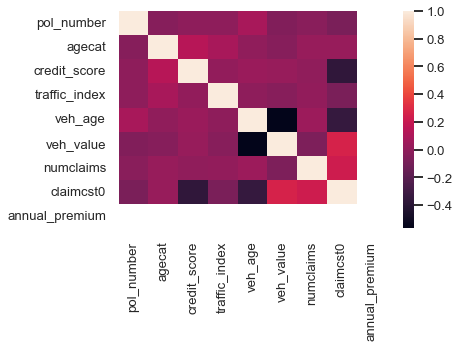

In [27]:
sns.heatmap(df_corr)

In [28]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
56059,26887735,1/28/2020,F,4.0,8/2/1961,708.00,C,132.0,3,SEDAN,1.419,D,1,161.258755,716.53
47306,60151089,3/20/2020,F,1.0,10/26/1998,491.00,E,58.5,1,STNWG,3.135,B,1,20657.362590,716.53
25301,15840343,8/1/2020,M,2.0,6/25/1985,527.00,C,139.5,4,STNWG,1.848,C,3,2032.002994,716.53
30095,94815203,7/2/2020,M,2.0,2/5/1986,661.41,D,88.1,4,HDTOP,1.386,B,1,739.313466,716.53
14020,57195579,10/7/2020,M,1.0,4/23/1995,661.41,A,112.6,4,UTE,1.364,B,4,1761.915983,716.53


In [29]:
num_atr = ['pol_number','pol_eff_dt','gender','agecat','date_of_birth','credit_score','area','traffic_index','veh_age','veh_body','veh_value','claim_office','numclaims','claimcst0','annual_premium']

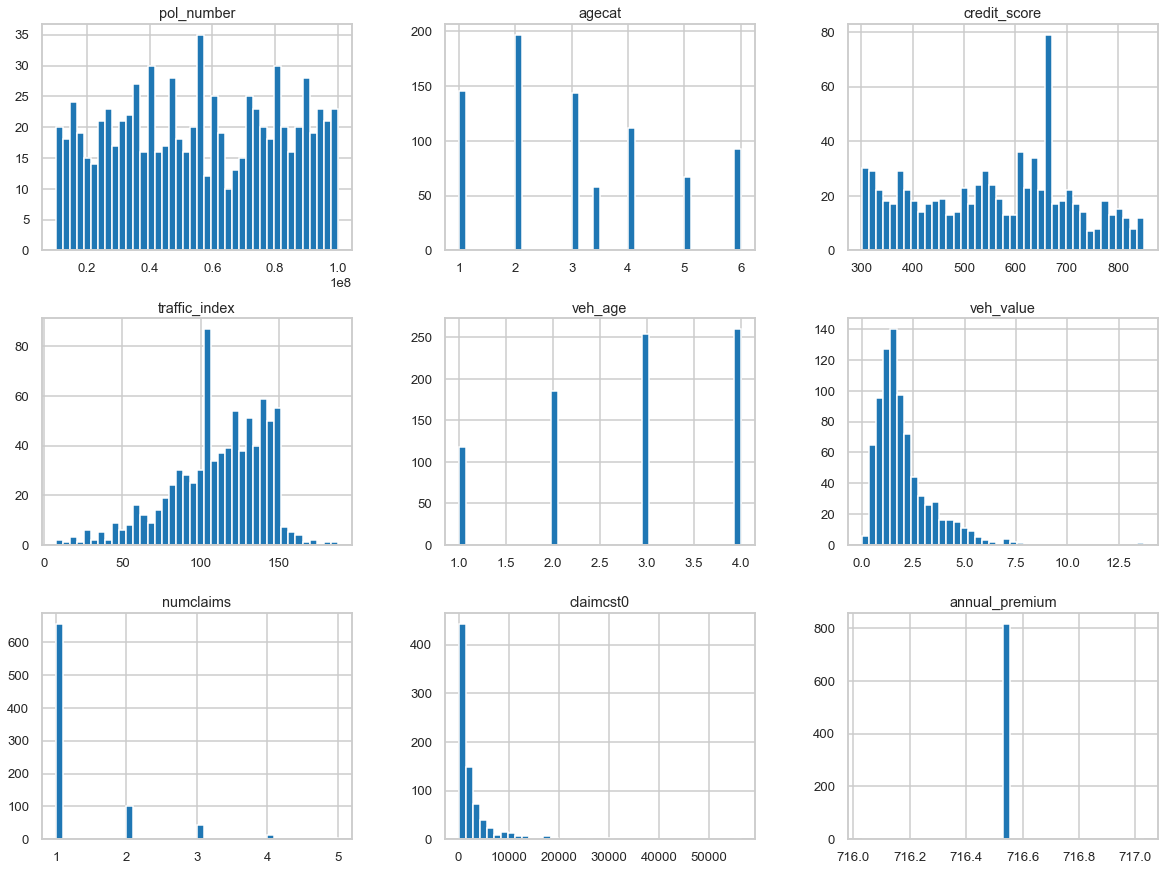

In [30]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [31]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
56059,26887735,1/28/2020,F,4.0,8/2/1961,708.00,C,132.0,3,SEDAN,1.419,D,1,161.258755,716.53
47306,60151089,3/20/2020,F,1.0,10/26/1998,491.00,E,58.5,1,STNWG,3.135,B,1,20657.362590,716.53
25301,15840343,8/1/2020,M,2.0,6/25/1985,527.00,C,139.5,4,STNWG,1.848,C,3,2032.002994,716.53
30095,94815203,7/2/2020,M,2.0,2/5/1986,661.41,D,88.1,4,HDTOP,1.386,B,1,739.313466,716.53
14020,57195579,10/7/2020,M,1.0,4/23/1995,661.41,A,112.6,4,UTE,1.364,B,4,1761.915983,716.53


In [32]:
df.drop(['pol_eff_dt'], axis=1, inplace=True)
df.drop(['gender'], axis=1, inplace=True)
df.drop(['date_of_birth'], axis=1, inplace=True)
df.drop(['area'], axis=1, inplace=True)
df.drop(['veh_body'], axis=1, inplace=True)
df.drop(['claim_office'], axis=1, inplace=True)


In [33]:
df.head()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
56059,26887735,4.0,708.00,132.0,3,1.419,1,161.258755,716.53
47306,60151089,1.0,491.00,58.5,1,3.135,1,20657.362590,716.53
25301,15840343,2.0,527.00,139.5,4,1.848,3,2032.002994,716.53
30095,94815203,2.0,661.41,88.1,4,1.386,1,739.313466,716.53
14020,57195579,1.0,661.41,112.6,4,1.364,4,1761.915983,716.53


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 56059 to 57984
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      817 non-null    int64  
 1   agecat          817 non-null    float64
 2   credit_score    817 non-null    float64
 3   traffic_index   817 non-null    float64
 4   veh_age         817 non-null    int64  
 5   veh_value       817 non-null    float64
 6   numclaims       817 non-null    int64  
 7   claimcst0       817 non-null    float64
 8   annual_premium  817 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 63.8 KB


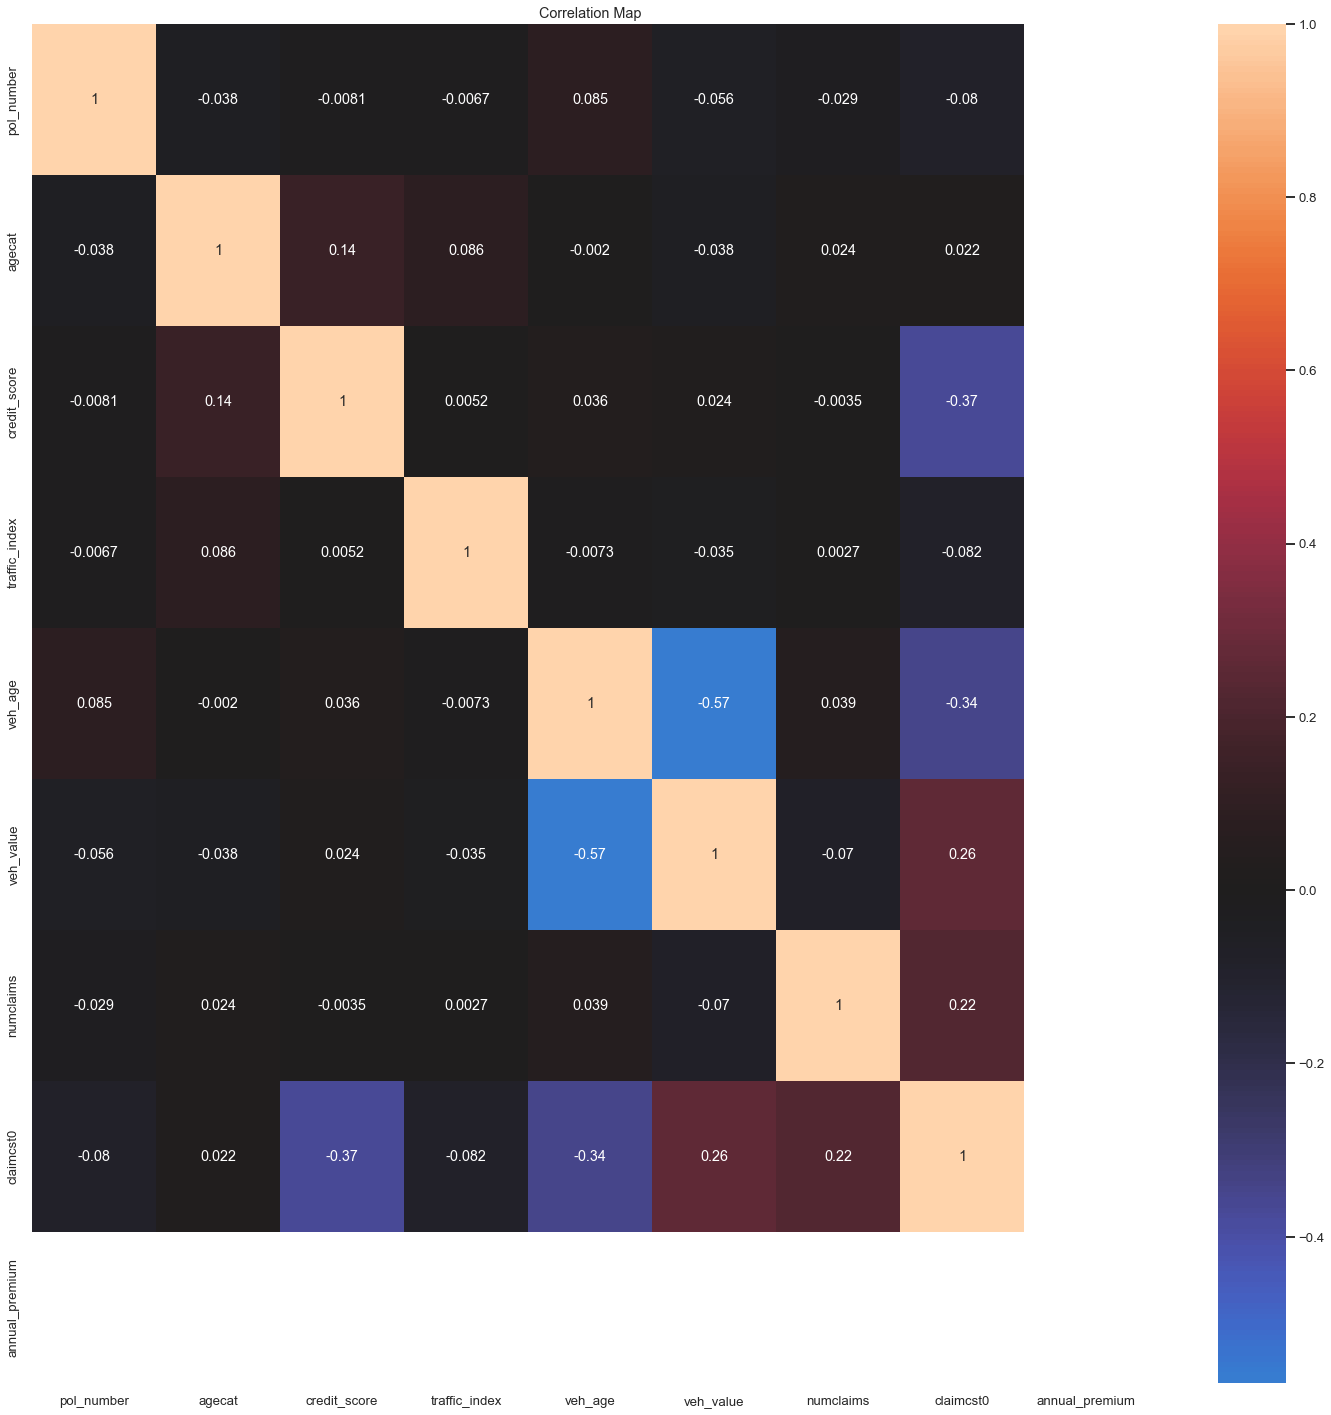

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

<Figure size 432x288 with 0 Axes>

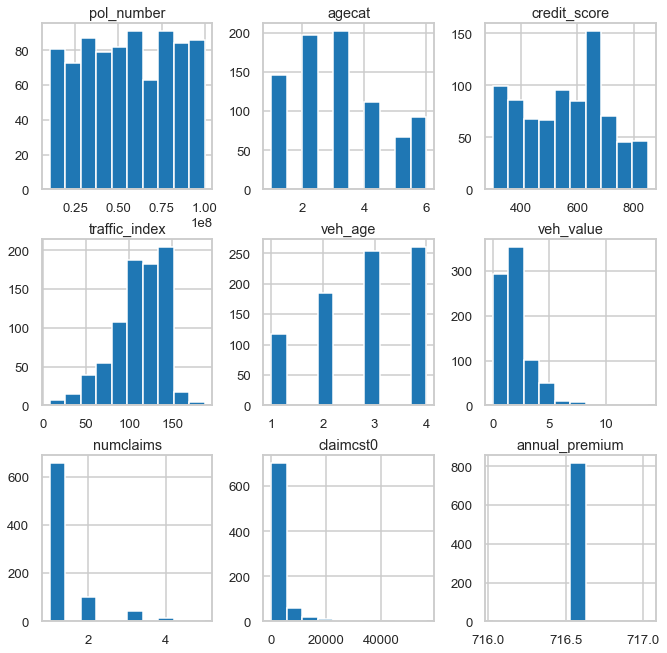

<Figure size 432x288 with 0 Axes>

In [36]:
df.hist(figsize=(11,11))
plt.figure()

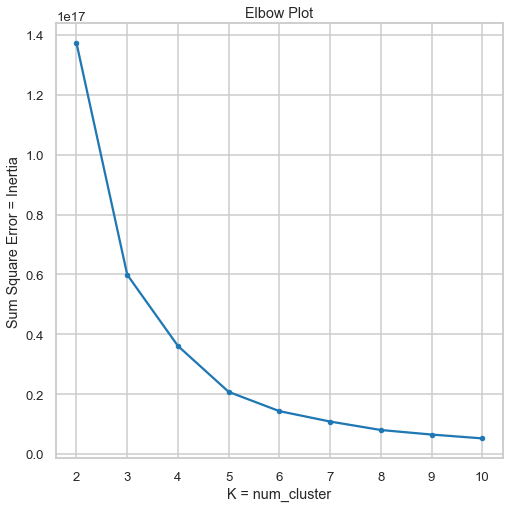

In [37]:
from sklearn.cluster import KMeans

x_cols = np.array(df.iloc[:, :32])
ss = [];
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, ss, marker='.')
axes.set(xlabel='K = num_cluster', ylabel = 'Sum Square Error = Inertia', title = 'Elbow Plot')
plt.show()

In [39]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(df)
df_scaled_array = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns = df.columns)

df_scaled.sample(5)

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
599,1.299339,0.250537,0.687433,0.050851,1.149977,-0.906725,-0.436031,-0.345146,0.0
815,-0.769375,1.226979,1.840209,-0.776412,-0.771355,0.015747,-0.436031,-0.449893,0.0
321,-0.176441,0.588782,-0.255870,-1.220065,1.149977,-0.474062,-0.436031,-0.042667,0.0
64,-1.334279,-1.325810,1.605072,-1.193379,-1.732021,0.358612,-0.436031,-0.389401,0.0
176,-0.413795,0.588782,0.986997,-0.843127,0.189311,-0.743456,1.060763,-0.321192,0.0


In [40]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(df_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(df_scaled)
y_cluster_kmeans

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,

In [41]:
from sklearn import metrics
score = metrics.silhouette_score(df_scaled, y_cluster_kmeans)
score

0.15067864713004986

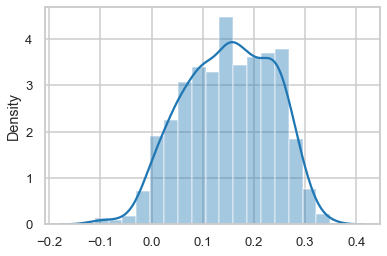

In [42]:
scores = metrics.silhouette_samples(df_scaled, y_cluster_kmeans)
sns.distplot(scores);

In [ ]:
#K-Means Clustering

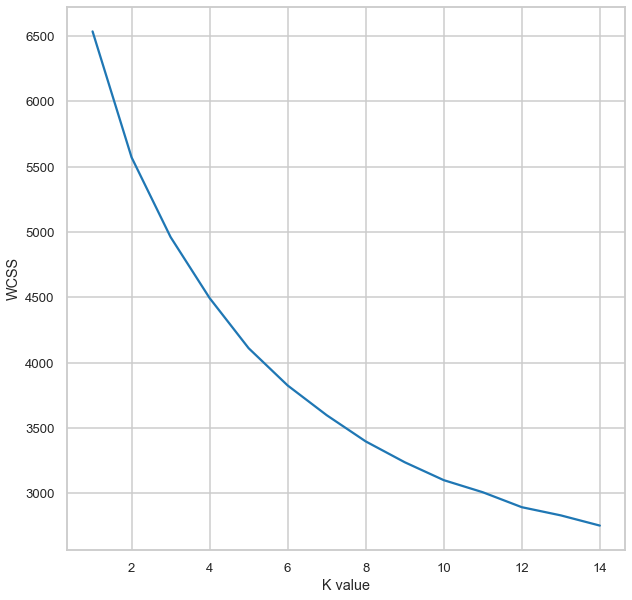

In [43]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df_scaled)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

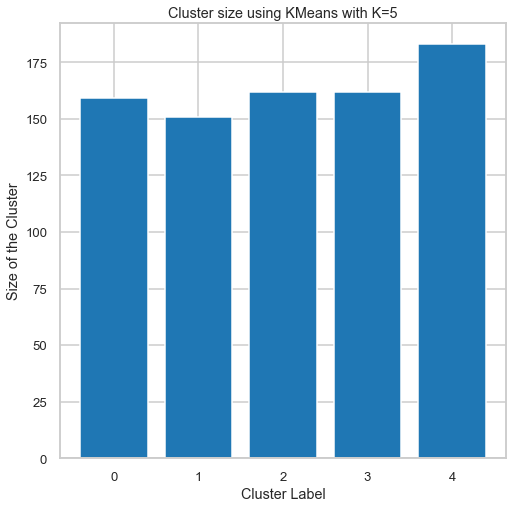

In [45]:
# Pick 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
df['labels'] = kmeans.fit_predict(x_cols)
cluster_size = df.labels.value_counts()
f, axes = plt.subplots(figsize=(8, 8))
axes.bar(cluster_size.index, cluster_size)
axes.set(xlabel='Cluster Label', ylabel='Size of the Cluster', title='Cluster size using KMeans with K=5')
plt.show()
df= df.drop('labels', axis=1)

In [ ]:
#The Silhouette Method

n_cluster=3, Average silhouette score = 0.598
n_cluster=4, Average silhouette score = 0.562
n_cluster=5, Average silhouette score = 0.580
n_cluster=6, Average silhouette score = 0.576
n_cluster=7, Average silhouette score = 0.561
n_cluster=8, Average silhouette score = 0.561
n_cluster=9, Average silhouette score = 0.561
n_cluster=10, Average silhouette score = 0.566


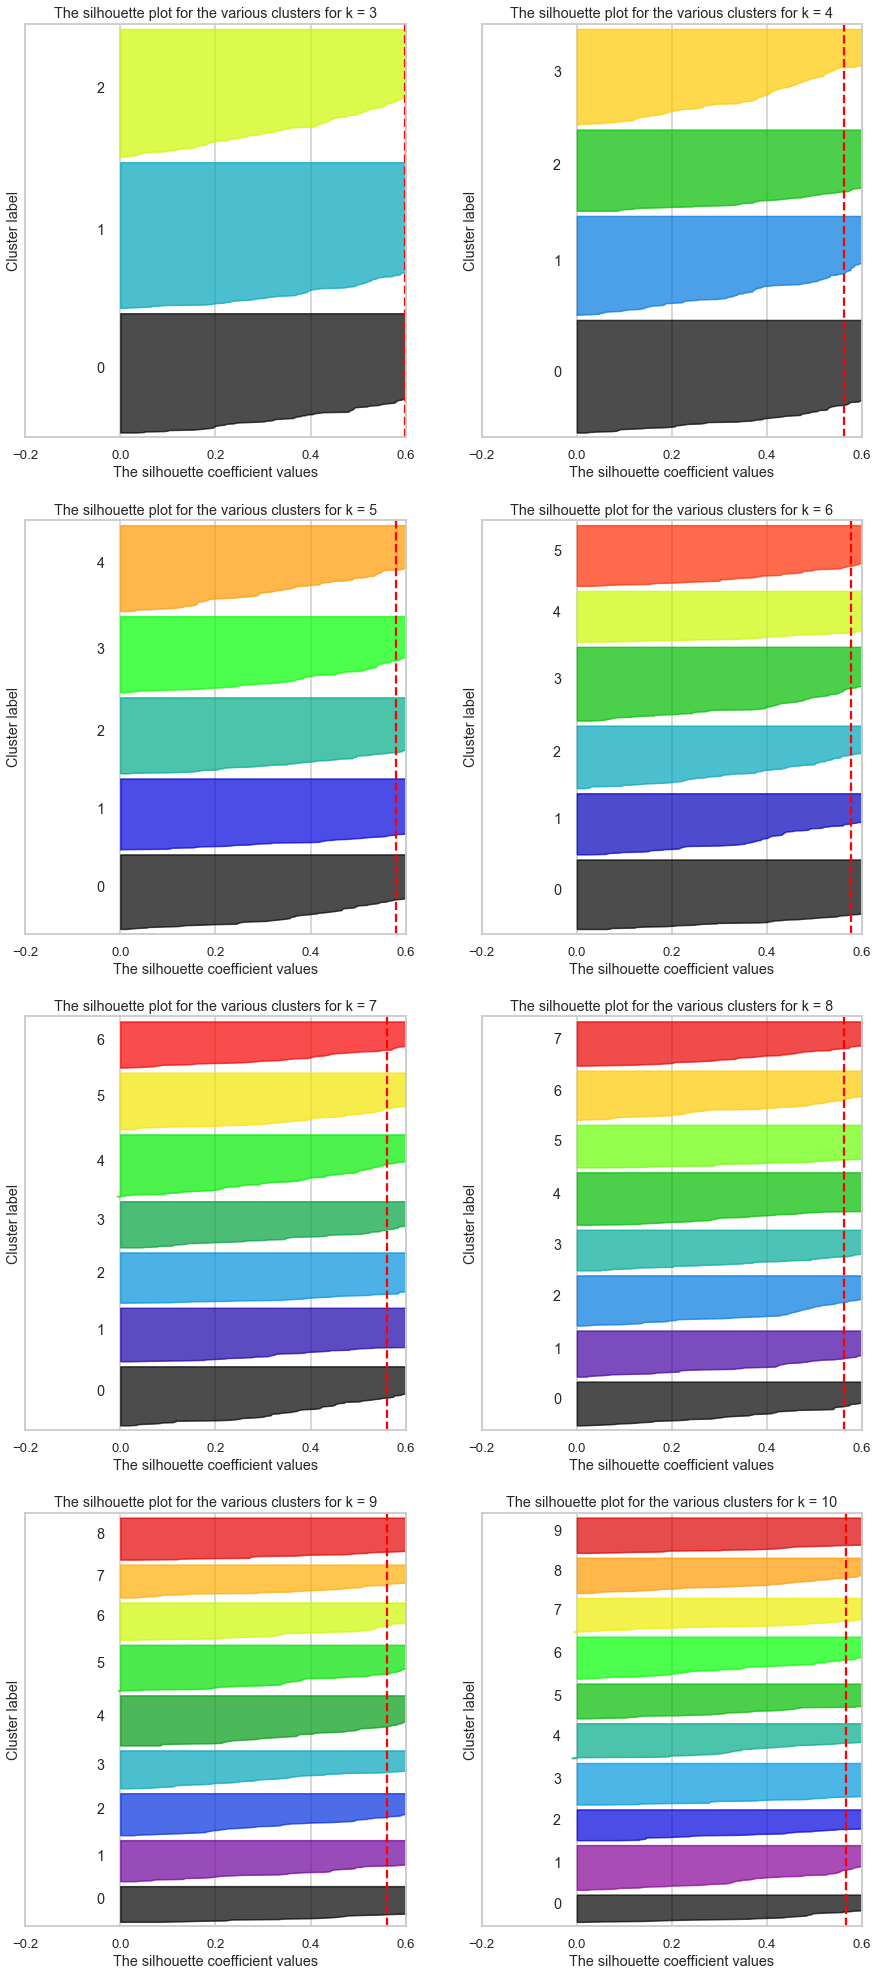

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
ks = range(3, 11)
f, axes = plt.subplots(len(ks)//2, 2, figsize=(15, 35))
silhouette_avg = []
for idx, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(x_cols, labels))
    print('n_cluster={0}, Average silhouette score = {1:.3f}'.format(k, silhouette_avg[-1]))
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, labels)
    
    # xlim: The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 0.6]
    # ylim: The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    axes[idx//2, idx%2].set(xlim=[-0.2, 0.6], ylim=[0, len(x_cols)+(k+1)*10])
    y_lower=10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        axes[idx//2, idx%2].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axes[idx//2, idx%2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    axes[idx//2, idx%2].set(xlabel='The silhouette coefficient values', ylabel='Cluster label')
    axes[idx//2, idx%2].set(title='The silhouette plot for the various clusters for k = {}'.format(k))
    axes[idx//2, idx%2].axvline(x=silhouette_avg[-1], color='red', linestyle='--')
    axes[idx//2, idx%2].set(yticks=[], xticks=[-0.2, 0, 0.2, 0.4, 0.6])

In [47]:
df.head()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
56059,26887735,4.0,708.00,132.0,3,1.419,1,161.258755,716.53
47306,60151089,1.0,491.00,58.5,1,3.135,1,20657.362590,716.53
25301,15840343,2.0,527.00,139.5,4,1.848,3,2032.002994,716.53
30095,94815203,2.0,661.41,88.1,4,1.386,1,739.313466,716.53
14020,57195579,1.0,661.41,112.6,4,1.364,4,1761.915983,716.53


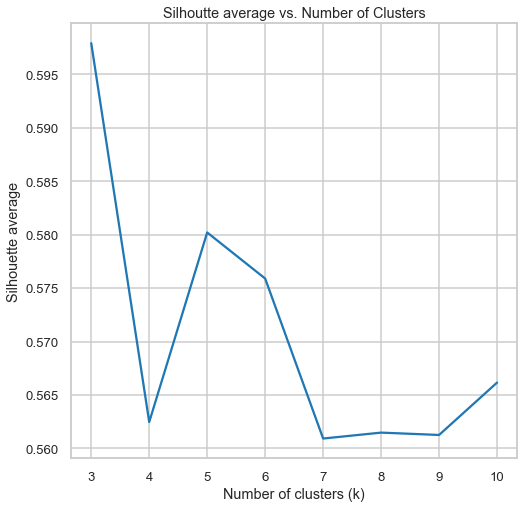

In [49]:
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, silhouette_avg)
axes.set(xlabel='Number of clusters (k)',ylabel = 'Silhouette average', title ='Silhoutte average vs. Number of Clusters')
plt.show()

In [ ]:
#Agglomerative Clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
algo_sil_score = pd.DataFrame(index=[ 'Agglomerative Clustering'])
algo_sil_score['algo_avg_silhouette_score']=0
algo_sil_score['cluster_size']=0

k_range = range(2, 11)
l_types = ['ward', 'complete', 'average']
#l_types = ['complete']
max_sil_score = -np.inf
best_k, best_l = None, None
for k in k_range:
    for l in l_types:
        ac = AgglomerativeClustering(n_clusters=k, linkage=l)
        labels = ac.fit_predict(x_cols)
        score = metrics.silhouette_score(x_cols, labels)
        (best_k, best_l, max_sil_score) = (k, l, score) if score>max_sil_score else (best_k, best_l, max_sil_score)
        #print(k, l, score, max_sil_score)
print('Best num cluster = {0:d}, Best linkage = {1}, Best silhouette score = {2:.3f}'.format(best_k, best_l, max_sil_score))

ac = AgglomerativeClustering(n_clusters=best_k, linkage=best_l)
labels = ac.fit_predict(x_cols)
print('Average Silhouette Score: {0:.3f}'.format(metrics.silhouette_score(x_cols, labels)))
algo_sil_score.loc['Agglomerative Clustering'] = [max_sil_score, best_k]

Best num cluster = 2, Best linkage = average, Best silhouette score = 0.622
Average Silhouette Score: 0.622
